# Spectrum example

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'figure.figsize': (10, 8)})
rcParams.update({'font.size': 14})


In [2]:
fs = 100 # Hz
y = np.loadtxt('../data/FFT_Example_data_with_window.txt')
t = np.linspace(0,len(y)/fs,len(y))

Text(0, 0.5, '$y$ [V]')

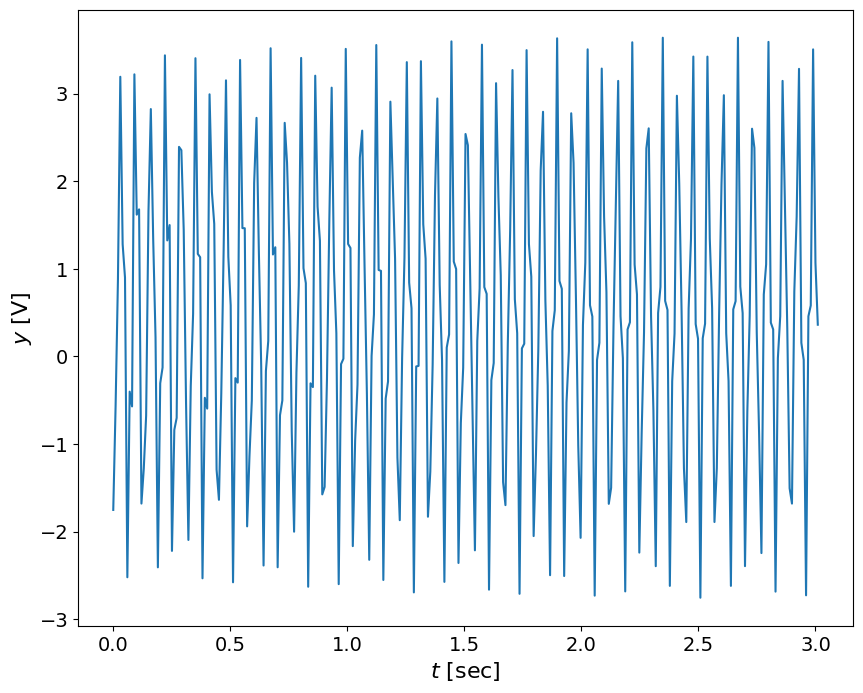

In [3]:
pl.plot(t,y)
pl.xlabel('$t$ [sec]',fontsize=16)
pl.ylabel('$y$ [V]',fontsize=16)

In [4]:
# subtract the DC:
yf = y - np.mean(y)

Text(0, 0.5, '$y - DC(y) $ [V]')

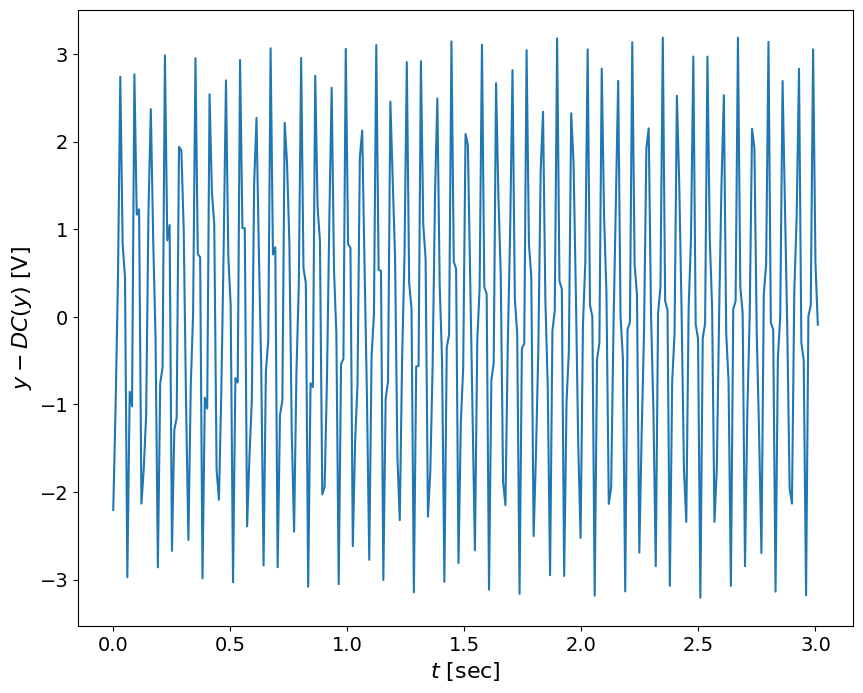

In [5]:
pl.plot(t,yf)
pl.xlabel('$t$ [sec]',fontsize=16)
pl.ylabel('$y - DC(y) $ [V]',fontsize=16)

In [6]:
def spectrum(y,Fs):
    """
    Plots a Single-Sided Amplitude Spectrum of a sampled
    signal y(t), sampling frequency Fs (lenght of a signal 
    provides the number of samples recorded)
    
    Following: http://goo.gl/wRoUn
    """
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(np.int(n/2))] # one side frequency range
    Y = 2*np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(np.int(n/2))]
    return frq, Y

def plotSignal(t,y,frq,Y):
    """ plots the time signal Y(t) and the 
    frequency spectrum Y(fs)
    Inputs:
        t - time 
        y - signal
    Outputs:
        t - time signal, [sec]
        Y - values, [Volt]
    Usage:
        plotSignal(t,y,fs)
    """

    # Plot
    pl.figure()
    pl.subplot(2,1,1)
    pl.plot(t,y,'b-')
    pl.xlabel('$t$ [s]',fontsize=16)
    pl.ylabel('$Y$ [V]',fontsize=16)
    # axes().set_aspect(0.2)
    # title('sampled signal')
    pl.subplot(2,1,2)
    pl.plot(frq,abs(Y),'r') # plotting the spectrum
    pl.xlabel('$f$ (Hz)',fontsize=16)
    pl.ylabel('$|Y(f)|$',fontsize=16)

/tmp/ipykernel_205905/3529218752.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frq = frq[range(np.int(n/2))] # one side frequency range
/tmp/ipykernel_205905/3529218752.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.

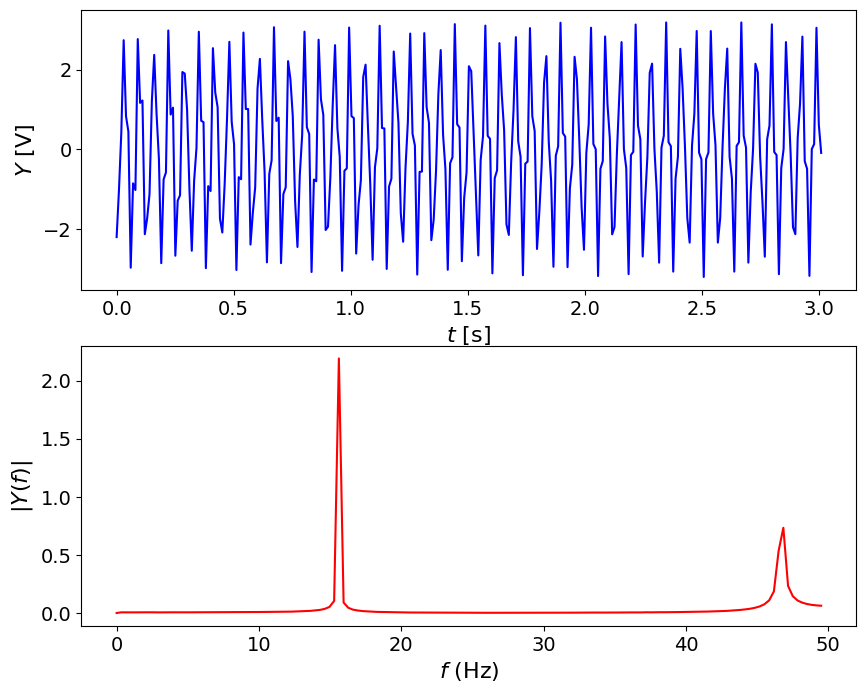

In [7]:
frq,Y = spectrum(yf,fs) 
plotSignal(t,yf,frq,Y)